# Week 12 handin

## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

### Part 2 (Optional)
1. From [Data](https://unsplash.com/search/photos/jeep) use selenium to download all images of jeeps
2. Use OpenCV to reduce the amount of colors in the images
3. Use OpenCV to find corners [Help](https://docs.opencv.org/master/d8/dd8/tutorial_good_features_to_track.html)
4. (EXTRA) Find all the wheels

## Follow this tutorial
https://www.mygreatlearning.com/blog/opencv-tutorial-in-python/#sh17

Take any number of exercises, that you can test out and try to apply the techniques on other different images of your own choice. Be aware that using the camera requires you to not use the docker setup. So if you want to play with that you would have to install Anaconda and OpenCV on you own machine.

## Status
Everything done.

## Solution part 1

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

der er ialt 6 apple


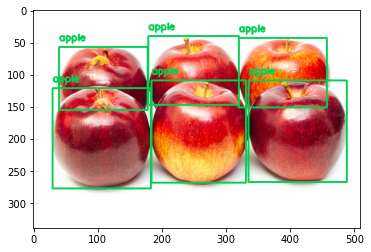

In [2]:
im = cv2.imread('./data/applesss.jpg')
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
print("der er ialt " + str(len(conf))+ " " +label[0])
img_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [36]:

# Imports
import numpy as np
import cv2
import time

# Read Image & Convert
img = cv2.imread('./data/index.jpeg')
result = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Filtering
lower = np.array([1,60,50])
upper = np.array([255,255,255])
result = cv2.inRange(result, lower, upper)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
result = cv2.dilate(result,kernel)

# Contours
contours, hierarchy = cv2.findContours(result.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
if len(contours) != 0:
    for (i, c) in enumerate(contours):
        area = cv2.contourArea(c)
        if area > 100000:
            print(area)
            cv2.drawContours(img, c, -1, (255,255,0), 12)
            x,y,w,h = cv2.boundingRect(c)            
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),12)

# Stack results
result = np.vstack((result, img))
resultOrig = result.copy()

# Save image to file before resizing
cv2.imwrite(str(time.time())+'_0_result.jpg',resultOrig)

# Resize
max_dimension = float(max(result.shape))
scale = 900/max_dimension
result = cv2.resize(result, None, fx=scale, fy=scale)

# Show results
cv2.imshow('res',result)

cv2.waitKey(0)
cv2.destroyAllWindows()


152953.0


In [40]:
def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL,                        cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

In [38]:
def create_ball_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    lower_red = np.array([160,20,70])
    upper_red = np.array([190,255,255])


    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, lower_red, upper_red) # inRange: exclude all pixels outside of range
    mask = cv2.dilate(mask, None, iterations=50)           # dilate: (like pupils) expand pixels around the center
    mask = cv2.erode(mask, None, iterations=50)            # erode: opposite of dilate. remove pixels from outer layer
    print(f'cv2.inRange(img,lower,higher){type(mask)} Image shape: {image.shape} and mask shape: {mask.shape}\n Image contains: {np.unique(image)}\n mask contains: {np.unique(mask)} which is good cause object to be found should be white and background should be black.')
    
    return mask

def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt

<class 'numpy.ndarray'> (600, 600, 3)
cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (600, 600, 3) and mask shape: (600, 600)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 20

<module 'matplotlib.pyplot' from '/home/donlange/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

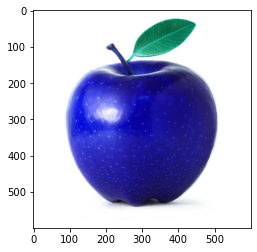

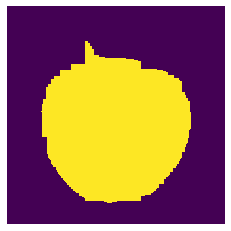

In [39]:
img = cv2.imread('./data/index.jpeg')   # Read the image
print(type(img),img.shape)
plt.imshow(img)   # Ploting the image using matplotlib
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
create_plot(create_ball_mask(img_rgb))


In [46]:
mask = create_ball_mask(img)
#img = mark_object(img, mask)

contours = cv2.findContours(mask, cv2.RETR_EXTERNAL,                        cv2.CHAIN_APPROX_SIMPLE)

img_converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('./data/index2.jpeg', img_converted)


cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (600, 600, 3) and mask shape: (600, 600)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


In [1]:
import numpy as np
import cv2
 
capture = cv2.VideoCapture(0)
 
while(True):
    # Capture frame-by-frame
    ret, frame = capture.read()
 
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
# When everything done, release the capture
capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
import numpy as np
import cv2
 
cap = cv2.VideoCapture('file_example_AVI_480_750kB.avi')
 
while(cap.isOpened()):
    ret, frame = cap.read()
 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.2.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [1]:
import numpy as np
import cv2
 
cap = cv2.VideoCapture(0)
 
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
 
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
 
        # write the flipped frame
        out.write(frame)
 
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
 
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## Solution part 2